 # Principal Component Analysis
 Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, in this notebooks we will use PCA to reduce the number of features for the seattle weather data.

In [1]:
#import the pakcages that we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549


#create an empty dataframe to hold values
PCA_df = pd.DataFrame({
                             'today':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows})

#sort columns for convience
seq = [
       'today',
       'tomorrow']
PCA_df = PCA_df.reindex(columns=seq)




In [3]:
#pull values from the dataframe
    
for z in range(numrows):
   
    today = df.iloc[(z-1),1]
    tomorrow = df.iloc[z,1]
    
    PCA_df.iat[z,0] = today
    PCA_df.iat[z,1] = tomorrow

PCA_df = PCA_df.dropna() #exclude any rows with missing data

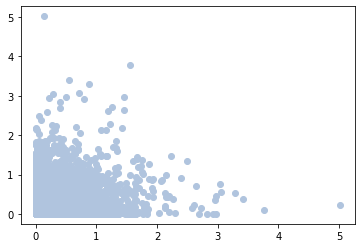

In [72]:
#Visualize the data before applying PCA

x = PCA_df.today.values
y = PCA_df.tomorrow.values
x = x.reshape(PCA_df.shape[0], 1)
y = y.reshape(PCA_df.shape[0], 1)

plt.scatter(x,y,c='LightSteelBlue')


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(PCA_df)


PCA(n_components=1)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [44]:
print(pca.components_)

[[0.70710678 0.70710678]]


In [45]:
print(pca.explained_variance_)

[0.07463308]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

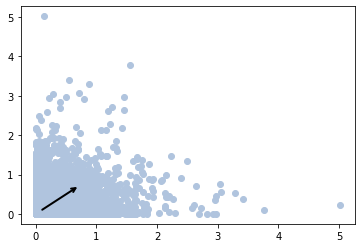

In [71]:

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(x,y,c='LightSteelBlue')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)




## PCA as dimensionality reduction

In [47]:
#Use PCA to reduce the number of features 

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(PCA_df)
X_pca = pca.transform(PCA_df)
print("original shape:   ", PCA_df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (25544, 2)
transformed shape: (25544, 1)


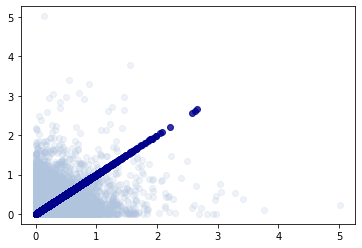

In [70]:
#Perform the inverse transform of this reduced data and plot it along with the original data

X_new = pca.inverse_transform(X_pca)
plt.scatter(x, y, alpha=0.2, c='LightSteelBlue')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8,c='DarkBlue')


**The light points are the original data, while the Dark points are the projected version.**